In [ ]:
# default_exp demassey

# Code for the Demassey instances (Multi-Activity Shift Scheduling)

This notebook contains code for the Demassey instances that were introduced in:
- Demassey, Sophie, Gilles Pesant, and Louis-Martin Rousseau. 2005. Constraint Programming Based Column Generation for Employee Timetabling. In Integration of AI and OR Techniques in Constraint Programming for Combinatorial Optimization Problems, ed. Roman Barták and Michela Milano, 140–154. Lecture Notes in Computer Science. Berlin, Heidelberg: Springer. https://doi.org/10.1007/11493853_12.

They are used in many other publications, as well.

This notebook provides the following functionality:
- an instance object (at the moment definded as Python `Box`, we may later move to a proper class) with reading functionality
- a RuleSet object

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export

import os

import numpy as np

from personnel_scheduling.data_structures import *


from collections import namedtuple

from box import Box
from dataclasses import dataclass, field

## Instance class


In [ ]:
#export

class DemasseyInstance():
        
    def __init__(self, filename):
        
        self.instance_name = filename[filename.rfind('/')+1:-4]        
        
        with open(filename) as f:
            self.number_of_periods = int(f.readline())
            self.max_work_periods_per_shift = int(f.readline())
            self.number_of_days_in_horizon = int(f.readline())
            self.is_continous = int(f.readline())
            self.instance_version = int(f.readline())
            self.meaningless_parameter = int(f.readline())
            self.number_of_employees =int(f.readline()[5:])
            self.skills = ([int(n) for n in f.readline()[:-1].split()])
            self.number_of_activities = int(f.readline()[4:])
            
            line_ints = [int(n) for n in f.readline()[:-1].split()]
        
            self.min_cons_periods = line_ints[0]
            self.max_cons_periods = line_ints[1]
            self.cost_per_activity_assignment = line_ints[2]
 
            self.activity_data = []
     
            for act in range(self.number_of_activities):
                self.activity_data.append( Box() )
                self.activity_data[act].demand = ([int(n) for n in f.readline()[:-1].split()])
                self.activity_data[act].over_covering_cost = ([int(n) for n in f.readline()[:-1].split()])
                self.activity_data[act].under_covering_cost = ([int(n) for n in f.readline()[:-1].split()])
                self.activity_data[act].demand_2 = ([int(n) for n in f.readline()[:-1].split()])
                f.readline()

                
    def get_aggregated_demand_per_period(self):
        demand_per_period = []
        for p in range(self.number_of_periods):
            demand = 0
            for act in range(self.number_of_activities):
                demand = demand + self.activity_data[act].demand[p]

            demand_per_period.append(demand)

        return demand_per_period

    def get_activity_demands_per_period(self):
        demands = []

        for activity in range(self.number_of_activities):
            demands.append(self.activity_data[activity].demand)

        return demands

        
    def get_average_work_hours(self):
        return (np.sum(self.get_aggregated_demand_per_period()) / self.number_of_employees) / 4
        
    def get_instance_information(self):
        return f'Info: Activities: {self.number_of_activities}, Employees: {self.number_of_employees}, ⌀ Workhours: {self.get_average_work_hours():.02f}'   
        

In [ ]:
## This is some old code, right now just kept for reference

## read instance
def read_instance(filename):

    
    with open(filename) as f:
        instance =  Box({'number_of_periods' : int(f.readline()), \
                         'max_work_periods_per_shift' : int(f.readline()), \
                         'number_of_days_in_horizon' : int(f.readline()), \
                         'is_continous' : int(f.readline()), \
                         'instance_version' : int(f.readline()), \
                         'meaningless_parameter' : int(f.readline()), \
                         'number_of_employees' : int(f.readline()[5:]), \
                         'skills' : ([int(n) for n in f.readline()[:-1].split()]), \
                         'number_of_activities' : int(f.readline()[4:])
        })

      
        line_ints = [int(n) for n in f.readline()[:-1].split()]
        
        instance.min_cons_periods = line_ints[0]
        instance.max_cons_periods = line_ints[1]
        instance.cost_per_activity_assignment = line_ints[2]
 
        instance.activity_data = []
        for act in range(instance.number_of_activities):
            instance.activity_data.append( Box())
            instance.activity_data[act].demand = ([int(n) for n in f.readline()[:-1].split()])
            instance.activity_data[act].over_covering_cost = ([int(n) for n in f.readline()[:-1].split()])
            instance.activity_data[act].under_covering_cost = ([int(n) for n in f.readline()[:-1].split()])
            instance.activity_data[act].demand_2 = ([int(n) for n in f.readline()[:-1].split()])
            f.readline()
        return instance

    def read_instance_demassey_new(filename):
        with open(filename) as f:
            instance =  Box({'number_of_periods' : 96, \
                             'max_work_periods_per_shift' : 32, \
                             'number_of_days_in_horizon' : 1, \
                             'is_continous' : 1, \
                             'instance_version' : 1, \
                             'meaningless_parameter' : 1, \
                             'number_of_employees' : int(f.readline()[5:]), \
                             'skills' : ([int(n) for n in f.readline()[:-1].split()]), \
                             'number_of_activities' : int(f.readline()[4:])
            })


            line_ints = [int(n) for n in f.readline()[:-1].split()]

            instance.min_cons_periods = line_ints[0]
            instance.max_cons_periods = line_ints[1]
            instance.cost_per_activity_assignment = line_ints[2]

            instance.activity_data = []
            for act in range(instance.number_of_activities):
                instance.activity_data.append( Box())
                instance.activity_data[act].demand = ([int(n) for n in f.readline()[:-1].split()])
                instance.activity_data[act].over_covering_cost = ([20 for n in range(96)])
                instance.activity_data[act].under_covering_cost = ([100 for n in range(96)])
                f.readline()
            return instance



### The full solution report

## Instance: shoe_1_3_1_9

Info: Activities: 3, Employees: 6, ⌀ Workhours: 6.33

### Feasible Solution with objective: 2450

### Grouped Penalties:

rule,penalty
ActivityCostPerPeriod,2250
UnderCovering,200


## Shift Schedule:

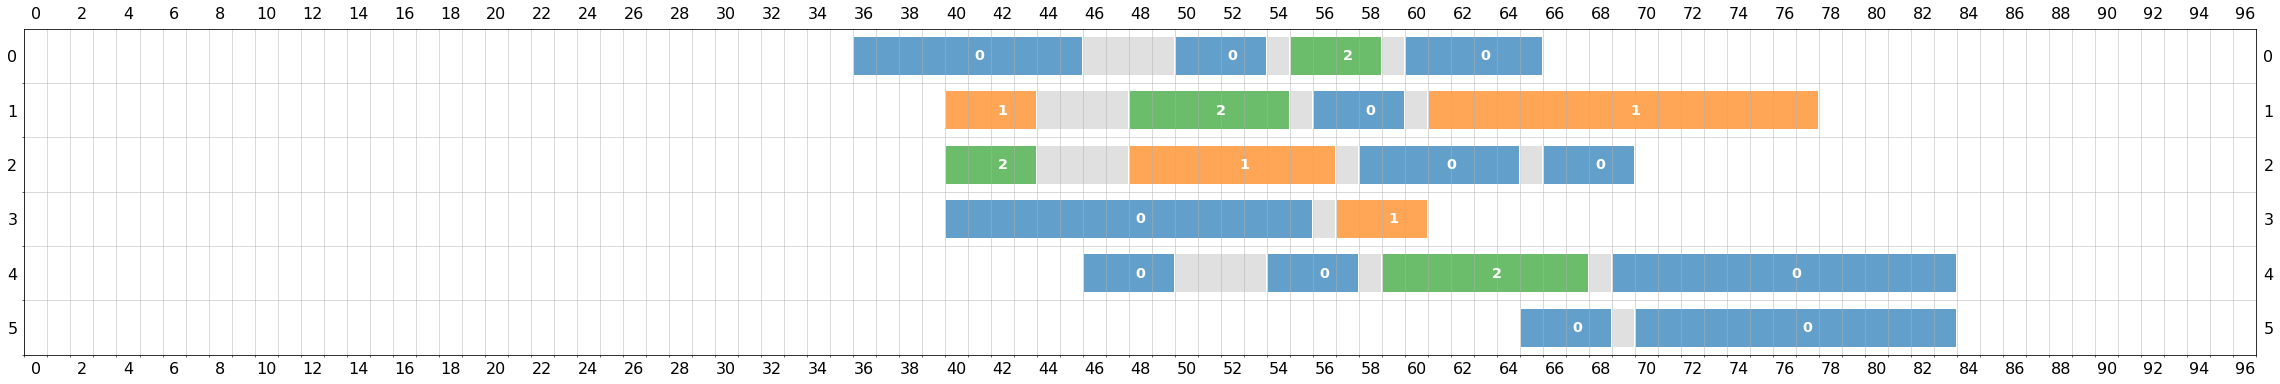

## Demands and Cover

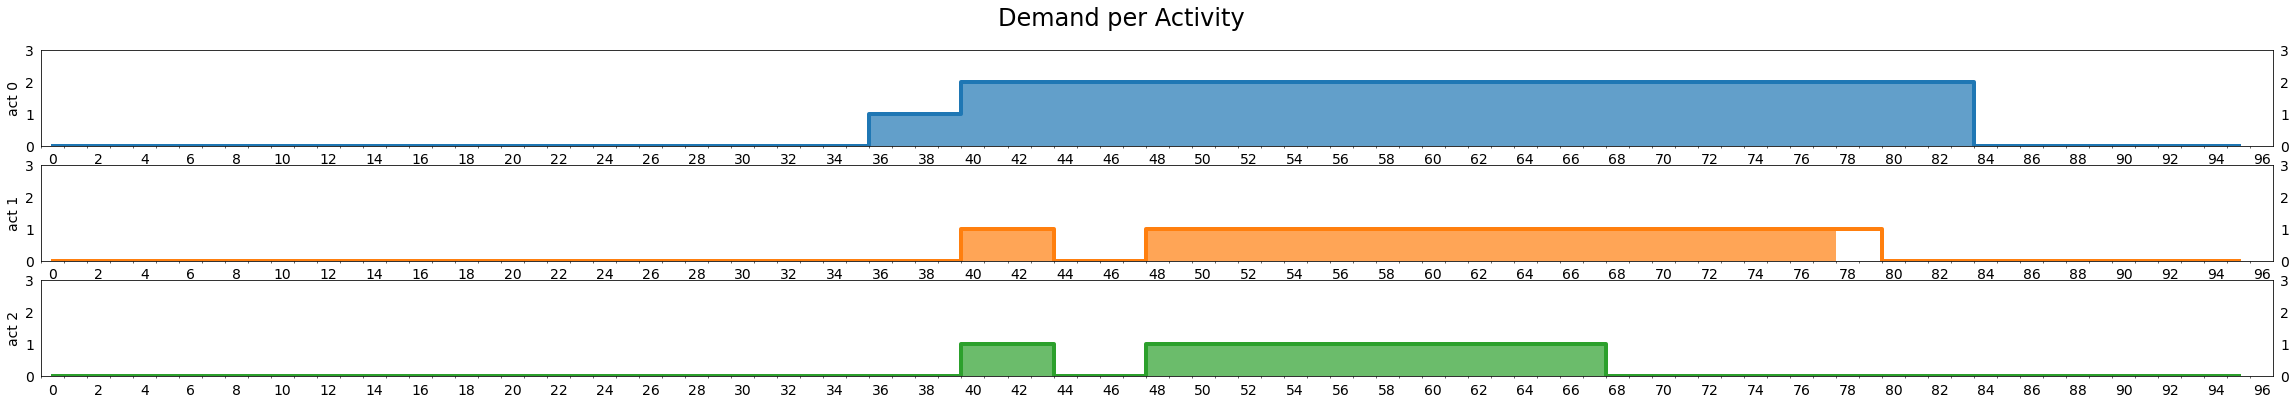

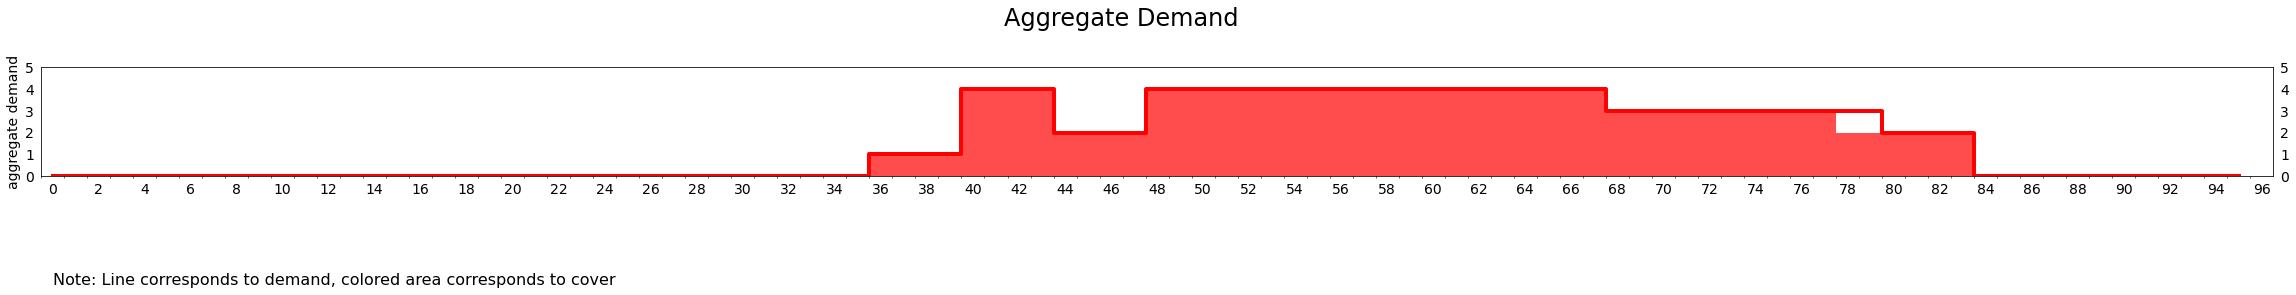

In [ ]:
instance_solution_report(instance, rule_set, shift_schedule)

## Exporting

In [ ]:


#hide
from nbdev.export import *
notebook2script()



Converted 00_data_stuctures.ipynb.
Converted 00_reporting.ipynb.
Converted 01_demassey.ipynb.
Converted 02_dahmen.ipynb.
Converted index.ipynb.
